In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_pickle("./data/interim/c2.pkl")
df

,session_id,session_timestamp,session_type,work_in_s,rest_in_s,work_in_m,rest_in_m,spm,time_split,power_in_avg_w,...,mc_week,mc_month,mc_quarter,mc_year_half,mc_year,mc_yearMonth,training_day,multi_training,session_type_group,session_type_class
0,38440889.0,2019-05-04 20:29:00,1x500m/1:00r row,113.3,60.0,500.0,14.0,31.0,01:53:18,241.0,...,18,05,2,1,2019,2019_05,True,False,Distance Interval Training,Interval Training
1,38440890.0,2019-05-05 10:24:00,5:05 row,305.1,0.0,1034.0,0.0,23.0,02:27:30,109.0,...,18,05,2,1,2019,2019_05,True,False,5:05 row,Timed Row
2,None,None,None,0.0,0.0,0.0,0.0,0.0,0,0.0,...,19,05,2,1,2019,2019_05,False,False,None,None
3,38440893.0,2019-05-07 17:59:00,3x4:00/1:00r row,720.0,180.0,2728.0,37.0,24.0,02:11:54,152.0,...,19,05,2,1,2019,2019_05,True,False,Time Interval Training,Interval Training
4,None,None,None,0.0,0.0,0.0,0.0,0.0,0,0.0,...,19,05,2,1,2019,2019_05,False,False,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,None,None,None,0.0,0.0,0.0,0.0,0.0,0,0.0,...,49,12,4,2,2019,2019_12,False,False,None,None
239,42587182.0,2019-12-07 14:24:00,5000m row,1404.7,0.0,5000.0,0.0,22.0,02:20:24,126.0,...,49,12,4,2,2019,2019_12,True,False,5000m row,Distance Row
240,None,None,None,0.0,0.0,0.0,0.0,0.0,0,0.0,...,49,12,4,2,2019,2019_12,False,False,None,None
241,42587183.0,2019-12-09 08:43:00,5000m row,1425.7,0.0,5000.0,0.0,23.0,02:22:30,121.0,...,50,12,4,2,2019,2019_12,True,False,5000m row,Distance Row


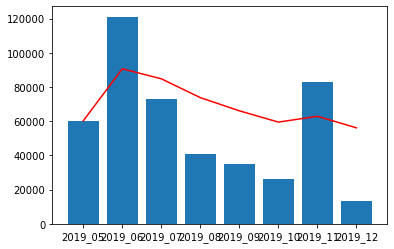

In [35]:
df_work_by_YearMonth = df.groupby(["mc_yearMonth"])["work_in_m"].sum()
df_work_sma = df_work_by_YearMonth.rolling(window=7, min_periods=1).mean()
plt.bar(df_work_by_YearMonth.index, df_work_by_YearMonth)
plt.plot(df_work_sma.index, df_work_sma, color="r")
plt.show()

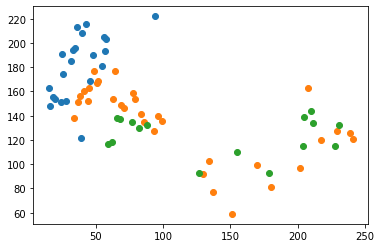

In [36]:
plt.scatter(
    df.index[df["session_type_group"] == "2000m row"],
    df["power_in_avg_w"][df["session_type_group"] == "2000m row"],
)
plt.scatter(
    df.index[df["session_type_group"] == "5000m row"],
    df["power_in_avg_w"][df["session_type_group"] == "5000m row"],
)
plt.scatter(
    df.index[df["session_type_group"] == "10000m row"],
    df["power_in_avg_w"][df["session_type_group"] == "10000m row"],
)
plt.show()


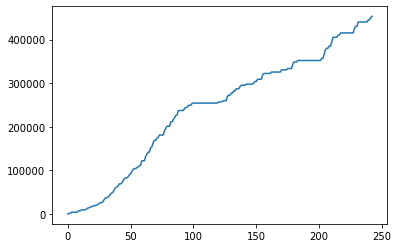

In [37]:
work_cum_in_m = df["work_in_m"].cumsum()
plt.plot(work_cum_in_m.index, work_cum_in_m)
plt.show()

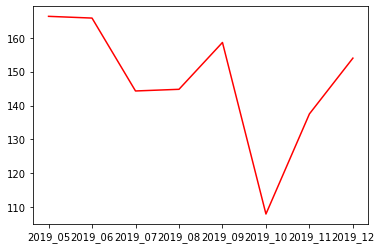

In [38]:
df_power_by_YearMonth = df[df["training_day"]==True].groupby(["mc_yearMonth"])["power_in_avg_w"].mean()
plt.plot(df_power_by_YearMonth.index, df_power_by_YearMonth, color="r")
#plt.bar(df.power_in_avg_w.index, df.power_in_avg_w, color="b")
plt.show()

In [46]:
df.power_in_avg_w[(df["mc_yearMonth"]=="2019_10")&(df["training_day"]==True)]

175    200.0
179     93.0
180     81.0
183     69.0
202     97.0
Name: power_in_avg_w, dtype: float64